In [ ]:
# Importing pandas library
import pandas as pd

# Use the upload() function to upload files
from google.colab import files
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    # Load the CSV file into a DataFrame with specified encoding
    df = pd.read_csv(file_name, encoding='latin-1')
    # Display the first few rows of the DataFrame
    print(df.head())

Saving yahoo_stock.csv to yahoo_stock.csv
         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'yahoo_stock.csv'
data = pd.read_csv(file_path)

# Define the categories based on quantiles
quantiles = data['Close'].quantile([0.33, 0.66])
data['Close_Category'] = pd.cut(data['Close'], bins=[data['Close'].min(), quantiles[0.33], quantiles[0.66], data['Close'].max()], labels=['Low', 'Medium', 'High'], include_lowest=True)

# Split the data
X = data.drop(['Close_Category', 'Date'], axis=1)
y = data['Close_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

Model accuracy: 1.0


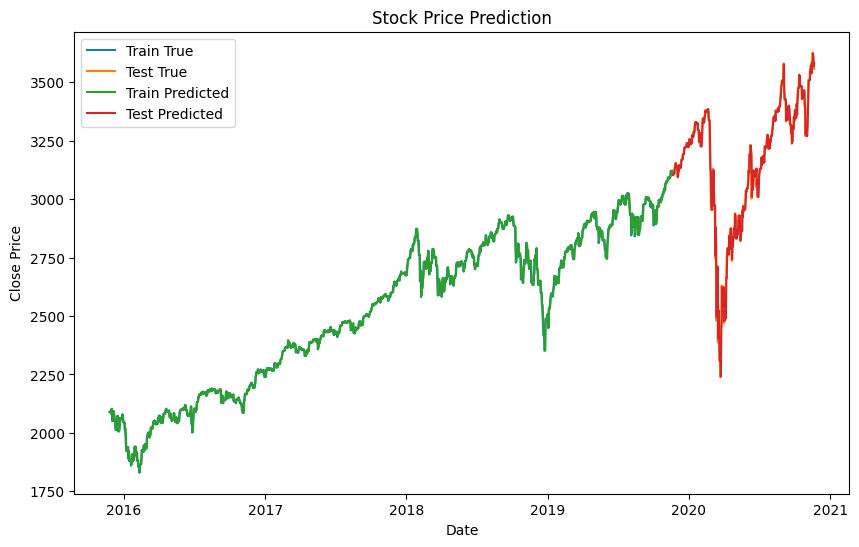

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'yahoo_stock.csv'
data = pd.read_csv(file_path)

# Assuming 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')  # Ensure data is sorted by date

# Feature engineering: create lag features
data['Close_Lag1'] = data['Close'].shift(1)  # Lag 1 day
data['Close_Lag2'] = data['Close'].shift(2)  # Lag 2 days
data['Close_Lag3'] = data['Close'].shift(3)  # Lag 3 days

# Drop rows with NaN values
data.dropna(inplace=True)

# Split the data
X = data[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y = data['Close']

# Splitting into training and testing sets
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][:train_size], y_train, label='Train True')
plt.plot(data['Date'][train_size:], y_test, label='Test True')
plt.plot(data['Date'][:train_size], y_pred_train, label='Train Predicted')
plt.plot(data['Date'][train_size:], y_pred_test, label='Test Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the data
file_path = 'yahoo_stock.csv'
data = pd.read_csv(file_path)

# Prepare the data by dropping the 'Date' column
X = data.drop(['Close', 'Date'], axis=1)
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict the next 5 days
# Assuming the last 5 rows in the dataset are the next 5 days to predict
next_5_days = data.tail(5).drop(['Close', 'Date'], axis=1)
predictions = model.predict(next_5_days)

# Add predictions to the dataframe
predicted_data = data.copy()
predicted_data.loc[predicted_data.index[-5:], 'Predicted_Close'] = predictions
df['Predicted_Close'] = df['Close'].shift(-1)
# Display the updated dataframe with predictions
predicted_data.tail(3)




,Date,High,Low,Open,Close,Volume,Adj Close,Predicted_Close
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3577.120120
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3579.194482
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039,3559.310515


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Drop rows with NaN values
df.dropna(inplace=True)

# Define features and target
X = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
y = df['Close']

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Predict the values
df['Predicted_Close'] = model.predict(X)

In [ ]:
predicted_data.tail(4)

,Date,High,Low,Open,Close,Volume,Adj Close,Predicted_Close
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,3606.354001
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3577.120120
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3579.194482
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039,3559.310515


In [ ]:
from sklearn.linear_model import LinearRegression

# Drop rows with NaN values in the features
df.dropna(subset=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], inplace=True)

# Define features and target
X = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
y = df['Close'].shift(-1)  # Predict next day close
y.fillna(method='ffill', inplace=True)  # Fill the last NaN with the previous value

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the values
df['Predicted_Close'] = model.predict(X)
# Display the updated dataframe
print(df.head())


         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  Predicted_Close  Predicted_2_Days_Close  
0  3.587980e+09  2086.590088      2089.101788             2089.138543  
1  3.884930e+09  2089.139893      2087.925907             2087.953006  
2  2.852940e+09  2088.870117      2091.225406             2091.260602  
3  2.852940e+09  2088.870117      2091.225406             2091.260602  
4  1.466840e+09  2090.110107      2091.732325             2091.764950  


In [ ]:
# Predict the next 2 days' close prices
# We already have the model trained, so we can use it to predict further

# Shift the target by 2 days to get the next 2 days' prices
y_2_days = df['Close'].shift(-1)
y_2_days.fillna(method='ffill', inplace=True)  # Fill the last NaN with the previous value

# Predict the values for the next 2 days
predicted_2_days = model.predict(X)



# Display the updated dataframe with new predictions
print(df.head())

         Date         High          Low         Open        Close  \
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  Predicted_Close  Predicted_2_Days_Close  
0  3.587980e+09  2086.590088      2089.101788             2089.138543  
1  3.884930e+09  2089.139893      2087.925907             2087.953006  
2  2.852940e+09  2088.870117      2091.225406             2091.260602  
3  2.852940e+09  2088.870117      2091.225406             2091.260602  
4  1.466840e+09  2090.110107      2091.732325             2091.764950  
